В датасете framingham.csv представлены данные, которые группа ученых из Фрамингема (США) использовала для выявления риска заболевания ишемической болезнью сердца в течение 10 лет.

Демографические данные: 

    sex (male): пол, мужчина (1) или женщина (0) 

    age: возраст 
    
    education: уровень образования (0-4: школа-колледж)
    
Поведенческие данные: 

    currentSmoker: курильщик (1) или нет (0)

    cigsPerDay: количество выкуриваемых сигарет в день (шт.)

Медицинская история:

    BPMeds: принимает ли пациент препараты для регулировки артериального давления (0 - нет, 1 - да)

    prevalentStroke: случался ли у пациента сердечный приступ (0 - нет, 1 - да)

    prevalentHyp: страдает ли пациент гипертонией (0 - нет, 1 - да)

    diabetes: страдает ли пациент диабетом (0 - нет, 1 - да)

Физическое состояние:

    totChol: уровень холестерина

    sysBP: систолическое (верхнее) артериальное давление 

    diaBP: диастолическое (нижнее) артериальное давление 

    BMI: индекс массы тела - масса (кг) / рост^2 (в метрах)

    heartRate: пульс

    glucose: уровень глюкозы

Целевая переменная (на которую авторы строили регрессию):

    TenYearCHD: риск заболевания ишемической болезнью сердца в течение 10 лет

Импорт библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.mlab as mlab
%matplotlib inline

Импорт датасета:

In [2]:
df = pd.read_csv('../data/framingham.csv')

Шапка датасета:

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Размер датасета:

In [4]:
df.shape

(4240, 16)

Названия столбцов датасета понадобятся нам, чтобы обращаться к отдельным признакам пациентов:

In [5]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Поиск missing values:

In [6]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Видим, что у 105 пациентов нет данных об образовании, у 388 - об уровне глюкозы. Недостающие данные могут стать причиной некорректных значений оценок, и от них лучше избавиться.

Количество строк, в которых есть missing values

In [9]:
count = 0
for i in df.isnull().sum(axis=1):
    if i>0:
        count += 1
print('Общее количество строк с пропущенными значениями: ', count)

Общее количество строк с пропущенными значениями:  582


Итого у нас 582 строки, в которых не хватает каких-нибудь данных

Найдем соотношение строк с недостающими данными и общего кол-ва строк

Если их будет относительно немного, то выгоднее избавиться от неполных строк, а если много, то надо посмотреть, в каких столбцах больше всего не хватает данных - возможно, выгоднее будет избавляться от них.

In [8]:
count/df.shape[0]

0.13726415094339622

Т.к. соотношение мало (13%), можем отбросить строки с отсутствующими данными):

In [10]:
df.dropna(axis=0, inplace=True)

Размеры датасета после удаления missing values:

In [11]:
df.shape

(3658, 16)

Получение описательных статистик при помощи фунции describe: 

In [12]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Данные полученные из describe:

    mean - среднее значение
    std - стандартное (среднеквадратичное) отклонение. 
    min - минимальное значение 
    max - максимальное значение
    25% - нижняя квартиль (медиана меньшей/левой половины выборки)
    50% - медиана
    75% - верхняя квартиль (медиана большей/правой половины выборки)

## Задания

1) Найдите общее количество пациентов с диабетом:

In [15]:
(df['diabetes'] == 1).sum()

99

2) Найдите долю диабетиков среди всех пациентов:

In [17]:
df['diabetes'].value_counts(normalize=True)

0    0.972936
1    0.027064
Name: diabetes, dtype: float64

3) Найдите долю пациентов группы риска среди пациентов с диабетом:

In [19]:
df.groupby('diabetes')['TenYearCHD'].value_counts(normalize=True)

diabetes  TenYearCHD
0         0             0.853330
          1             0.146670
1         0             0.646465
          1             0.353535
Name: TenYearCHD, dtype: float64

4) Найдите долю пациентов группы риска среди пациентов без диабета:

In [21]:
df[df['diabetes'] == 0]['TenYearCHD'].value_counts(normalize=True)

0    0.85333
1    0.14667
Name: TenYearCHD, dtype: float64

5) Найдите долю диабетиков среди пациентов группы риска:

In [22]:
df.groupby('TenYearCHD')['diabetes'].value_counts(normalize=True)

TenYearCHD  diabetes
0           0           0.979361
            1           0.020639
1           0           0.937163
            1           0.062837
Name: diabetes, dtype: float64

6) Найдите долю диабетиков среди пациентов не из группы риска:

In [23]:
df.query('TenYearCHD == 0')['diabetes'].value_counts(normalize=True)

0    0.979361
1    0.020639
Name: diabetes, dtype: float64

7) Найдите среднее и медианное значения систолического давления среди пациентов-диабетиков:

In [25]:
df.groupby('diabetes')['sysBP'].agg(['mean', 'median'])

,mean,median
diabetes,,
0,131.992835,128.0
1,145.949495,142.0


8) Постройте матрицу корреляций для признаков пациентов в группе риска. Найдите 2 признака с самой сильной взаимосвязью. Выпишите коэффициент корреляции между ними, округлите до сотых.

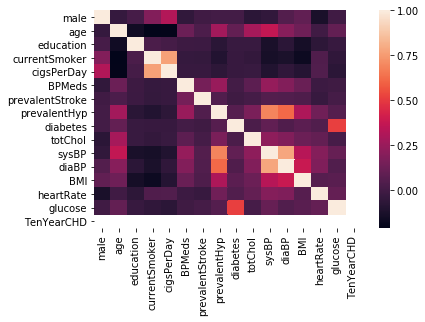

In [27]:
sn.heatmap(df.query('TenYearCHD == 0').corr())

In [34]:
dfc = df.query('TenYearCHD == 0').corr()
dfc[dfc < 1].max().max()

0.7850456701355878